## Homework 3
### Student Details
**Name:** Atul Parida<br>
**Student ID:** 1006184<br>
**Course ID** 50.007 Machine Learning (Summer 2023)<br>

### Instructions to run
Press *Run All* to run all cells for the given Jupyter notebook. This notebook was compiled using the Python 3.9.13 kernel.

### Notes
The following code provides solutions only for the questions in the homework that require programming. All other solutions have been answered in the PDF file attached to the submission.

### Question 1

Download and install the widely used SVM implementation LIBSVM (https://github.com/cjlin1/libsvm, or https://www.csie.ntu.edu.tw/ ̃cjlin/
libsvm/; clicking on either link takes you to the webpage). We expect you to install the package on your own – this is part of learning how to use off-the-shelf machine learning software. Read the documentation to understand how to use it.

Download promoters.zip. In that folder are training.txt and test.txt, which respectively contain 74 training examples and 32 test examples in LIBSVM format. The goal is to predict whether a certain DNA sequence is a promoter or not based on 57 attributes about the sequence (this is a binary classification task).

Run LIBSVM to classify promoters with different kernels (0-3), using default values for all other parameters. What is your test accuracy for each kernel choice?

In [1]:
### COMMON IMPORTS ###

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from libsvm.svmutil import *
import os

In [2]:
### PATH STORAGE ###

current_path = os.path.curdir
train_path = os.path.join(current_path, 'HW3_data', 'promoters','training.txt')
test_path = os.path.join(current_path, 'HW3_data', 'promoters','test.txt')

### DATA LOADING FUNCTION ###

def load_libsvm_data(file_path):
    y, x = svm_read_problem(file_path)
    return y, x

### DATA LOADING ###

y_train, x_train = load_libsvm_data(train_path)
y_test, x_test = load_libsvm_data(test_path)

In [3]:
# Train and test SVM models with different kernels (0-3)
kernel_choices = [0, 1, 2, 3]
accuracy_results = []

for kernel in kernel_choices:
    print(f"Training SVM with kernel {kernel}...")
    model = svm_train(y_train, x_train, f"-t {kernel}")
    p_label, p_acc, _ = svm_predict(y_test, x_test, model)
    accuracy_results.append(p_acc[0])

# Display test accuracy for each kernel choice
for i, kernel in enumerate(kernel_choices):
    print(f"Test accuracy for kernel {kernel}: {accuracy_results[i]}%")

Training SVM with kernel 0...
Accuracy = 84.375% (27/32) (classification)
Training SVM with kernel 1...
Accuracy = 81.25% (26/32) (classification)
Training SVM with kernel 2...
Accuracy = 90.625% (29/32) (classification)
Training SVM with kernel 3...
Accuracy = 43.75% (14/32) (classification)
Test accuracy for kernel 0: 84.375%
Test accuracy for kernel 1: 81.25%
Test accuracy for kernel 2: 90.625%
Test accuracy for kernel 3: 43.75%


### Question 3
You are given a training set diabetes train.csv. Each row in the file contains the probabil-
ity that a patient has diabetes, followed by values of 20 unknown features (x1,x2,...,x20). Write
Python code to train a logistic regression model with stochastic gradient descent (SGD). Run
SGD for 10,000 iterations, and save the model weights after every 100 iterations. Plot the log-
likelihood of the training data given by your model at every 100 iterations. (Log-likelihood is
log ∏n
i=1 P(yi | xi) = ∑n
i=1 logP(yi | xi) where (xi,yi) is an example.) Provide crystal clear
instructions along with the source code on how to execute it. Try a learning rate of 0.1.
From the values of the weights obtained, which five features do you think are the most important?
How did you choose these five features?

In [4]:
### DATA LOADING ###

q3_train_path = os.path.join(current_path, 'HW3_data', 'train_diabetes.csv')

data = pd.read_csv(q3_train_path, header=None)
x = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood(X, y, weights):
    scores = np.dot(X, weights)
    max_score = np.max(scores)
    loglik_val = np.log(np.sum(np.exp(scores - max_score))) - np.log(np.sum(np.exp(-max_score)))
    loglik_val -= np.sum(np.log(1 + np.exp(scores - max_score)))
    return loglik_val / X.shape[0]

def logistic_regression_sgd(X, y, learning_rate=0.01, num_iterations=10000, save_interval=100):
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    log_liks = []

    for i in range(num_iterations + 1):
        # Step 1: Shuffle data
        indices = np.arange(X.shape[0])  # Create an array of indices from 0 to the number of data points
        np.random.shuffle(indices)      # Randomly shuffle the indices
        X_shuffled = X[indices]         # Shuffle the data and labels based on the shuffled indices
        y_shuffled = y[indices]
        
        # Step 2: Iterate over shuffled data
        for j in range(X.shape[0]):
            x_j = X_shuffled[j]          # Get the feature vector of the current data point
            y_j = y_shuffled[j]          # Get the label of the current data point
            score_j = np.dot(x_j, weights)  # Compute the dot product of the features and weights (score)
            gradient = -y_j * x_j * sigmoid(-y_j * score_j)  # Compute the gradient of the log-likelihood
            weights -= learning_rate * gradient  # Update the weights using the learning rate and gradient
        
        # Step 3: Save weights and log-likelihood at specified intervals
        if i % save_interval == 0:
            loglik_result = log_likelihood(X, y, weights)  # Compute the log-likelihood using updated weights
            log_liks.append(loglik_result)  # Store the log-likelihood value
            print(f"Iter no {i} has a log-likelihood of {loglik_result}.")

    return weights, log_liks

# Example usage:
learning_rate = 0.1
iter_n = 10000
save_interval = 100

# Model training with input data 'x' and labels 'y'
weights, log_likelihoods = logistic_regression_sgd(x, y, learning_rate, iter_n, save_interval)


Iter no 0 has a log-likelihood of -0.006541061320199072.
Iter no 100 has a log-likelihood of 0.00841986921074935.
Iter no 200 has a log-likelihood of 0.010530201109518576.
Iter no 300 has a log-likelihood of 0.012205332547770049.
Iter no 400 has a log-likelihood of 0.013498168203028987.
Iter no 500 has a log-likelihood of 0.014351755009352278.
Iter no 600 has a log-likelihood of 0.015403494994009222.
Iter no 700 has a log-likelihood of 0.016141446907562598.
Iter no 800 has a log-likelihood of 0.016786925130227698.


KeyboardInterrupt: 

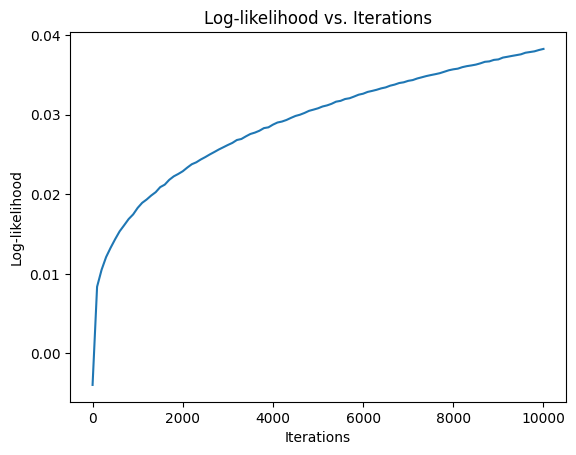

Five most important features:
Feature 19: Weight = -112.70191209105873
Feature 2: Weight = -112.12500372620119
Feature 3: Weight = 56.440129621090826
Feature 20: Weight = 55.014636860222645
Feature 1: Weight = 53.15886567881427


In [10]:
# Plot log-likelihood vs. iterations
iterations = range(0, iter_n + 1, save_interval)
plt.plot(iterations, log_likelihoods)
plt.xlabel('Iterations')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood vs. Iterations')
plt.show()

#Five most important features
# Get the absolute values of the weights
absolute_weights = np.abs(weights)
# Get the indices of the five features with the highest absolute weights
top_five_indices = np.argsort(absolute_weights)[-5:][::-1]
# Get the feature names corresponding to the top five indices
feature_names = data.columns[1:].values
top_five_features = feature_names[top_five_indices]
top_five_weights = weights[top_five_indices]
print("Five most important features:")
for i in range(5):
    print(f"Feature {top_five_features[i]}: Weight = {top_five_weights[i]}")
